# Julia 機器學習：Clustering 分群模型

## 作業 028：資料分群

從提供的檔案中讀取資料，利用分群模型將資料分群後並將資料視覺化。資料中有 15 群，並利用 k-means 去對資料做分群。資料取自 http://cs.uef.fi/sipu/datasets/

In [9]:
using Clustering, CSV, DataFrames, Gadfly

┌ Info: Recompiling stale cache file /Users/prestonyu9011/.julia/compiled/v1.2/Gadfly/DvECm.ji for Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004]
└ @ Base loading.jl:1240


## 讀取資料

In [2]:
data = CSV.read("s1-set.csv")

┌ Warning: `CSV.read(input; kw...)` is deprecated in favor of `CSV.read(input, DataFrame; kw...)
└ @ CSV /Users/prestonyu9011/.julia/packages/CSV/vohbW/src/CSV.jl:41


5000×2 DataFrame
│ Row  │ x      │ y      │
│      │ Int64  │ Int64  │
├──────┼────────┼────────┤
│ 1    │ 664159 │ 550946 │
│ 2    │ 665845 │ 557965 │
│ 3    │ 597173 │ 575538 │
│ 4    │ 618600 │ 551446 │
│ 5    │ 635690 │ 608046 │
│ 6    │ 588100 │ 557588 │
│ 7    │ 582015 │ 546191 │
│ 8    │ 604678 │ 574577 │
│ 9    │ 572029 │ 518313 │
│ 10   │ 604737 │ 574591 │
⋮
│ 4990 │ 681053 │ 892766 │
│ 4991 │ 683321 │ 873932 │
│ 4992 │ 701017 │ 931252 │
│ 4993 │ 645677 │ 814395 │
│ 4994 │ 677362 │ 853471 │
│ 4995 │ 659046 │ 930099 │
│ 4996 │ 665426 │ 853940 │
│ 4997 │ 691827 │ 863963 │
│ 4998 │ 650661 │ 861267 │
│ 4999 │ 599647 │ 858702 │
│ 5000 │ 684091 │ 842566 │

In [3]:
data_matrix = Matrix(data)'

2×5000 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
 664159  665845  597173  618600  635690  …  691827  650661  599647  684091
 550946  557965  575538  551446  608046     863963  861267  858702  842566

In [4]:
# cluster data into 15 clusters using K-means
num_clusters = 15
result = kmeans(data_matrix, num_clusters; maxiter=200, display=:iter);

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       3.041472e+13
      1       1.863398e+13      -1.178074e+13 |       15
      2       1.822971e+13      -4.042729e+11 |       10
      3       1.819391e+13      -3.579971e+10 |        9
      4       1.818603e+13      -7.877588e+09 |        6
      5       1.818286e+13      -3.170733e+09 |        5
      6       1.818077e+13      -2.085734e+09 |        5
      7       1.817766e+13      -3.117874e+09 |        5
      8       1.817398e+13      -3.673672e+09 |        5
      9       1.816910e+13      -4.878535e+09 |        5
     10       1.816692e+13      -2.185531e+09 |        3
     11       1.816551e+13      -1.407649e+09 |        2
     12       1.816456e+13      -9.455658e+08 |        2
     13       1.816345e+13      -1.112964e+09 |        3
     14       1.816225e+13      -1.204938e+09 |        3
     15       1.816125e+13      -9.963594e+08 |        

In [5]:
@assert nclusters(result) == num_clusters  # verify the number of clusters

In [6]:
data[!, :cluster] = string.(assignments(result));  # get the assignments of points to clusters
c = counts(result)  # get the cluster sizes
M = result.centers  # get the cluster centers
println(c)
println(M)

[351, 341, 319, 316, 335, 669, 352, 340, 197, 349, 314, 340, 130, 297, 350]
[507818.3133903134 244654.88563049852 823421.2507836991 801616.7816455696 168295.41492537313 369091.3288490284 670929.0681818182 320602.55 863080.0 858947.9713467049 417799.6942675159 616092.8911764706 835356.5692307692 606574.9562289562 141004.54285714286; 175610.41595441595 847642.0410557184 731145.2727272727 321123.3417721519 347724.8179104478 481230.67563527654 862765.7329545454 161521.85 170407.4568527919 546259.659025788 787001.9936305733 399622.4294117647 138406.9 574455.1683501684 557993.22]


In [7]:
data

5000×3 DataFrame
│ Row  │ x      │ y      │ cluster │
│      │ Int64  │ Int64  │ String  │
├──────┼────────┼────────┼─────────┤
│ 1    │ 664159 │ 550946 │ 14      │
│ 2    │ 665845 │ 557965 │ 14      │
│ 3    │ 597173 │ 575538 │ 14      │
│ 4    │ 618600 │ 551446 │ 14      │
│ 5    │ 635690 │ 608046 │ 14      │
│ 6    │ 588100 │ 557588 │ 14      │
│ 7    │ 582015 │ 546191 │ 14      │
│ 8    │ 604678 │ 574577 │ 14      │
│ 9    │ 572029 │ 518313 │ 14      │
│ 10   │ 604737 │ 574591 │ 14      │
⋮
│ 4990 │ 681053 │ 892766 │ 7       │
│ 4991 │ 683321 │ 873932 │ 7       │
│ 4992 │ 701017 │ 931252 │ 7       │
│ 4993 │ 645677 │ 814395 │ 7       │
│ 4994 │ 677362 │ 853471 │ 7       │
│ 4995 │ 659046 │ 930099 │ 7       │
│ 4996 │ 665426 │ 853940 │ 7       │
│ 4997 │ 691827 │ 863963 │ 7       │
│ 4998 │ 650661 │ 861267 │ 7       │
│ 4999 │ 599647 │ 858702 │ 7       │
│ 5000 │ 684091 │ 842566 │ 7       │

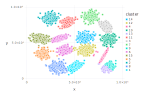

In [10]:
plot(data, x="x", y="y", color="cluster", Geom.point)